In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as mt

np.random.seed(1326)
pd.set_option("display.max_columns", None)

In [16]:
df = pd.read_csv("../datasets/full_dataset.csv")

display(df.info())
display(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112010 entries, 0 to 3112009
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date                     object 
 1   Lat                      float64
 2   Long                     float64
 3   Total Rainfall Today     float64
 4   Rainfall Duration Today  int64  
 5   Year                     int64  
 6   Department               object 
 7   Municipality             object 
 8   elevation                float64
 9   Forest Loss %            float64
 10  Landslide                int64  
 11  Soil_1                   float64
 12  Soil_2                   float64
 13  Soil_3                   float64
 14  Soil_4                   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 356.1+ MB


None

,Lat,Long,Total Rainfall Today,Rainfall Duration Today,Year,elevation,Forest Loss %,Landslide,Soil_1,Soil_2,Soil_3,Soil_4
count,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06,3.112010e+06
mean,5.550238e+00,-7.463048e+01,6.184781e+00,1.052745e+01,2.013500e+03,1.189075e+03,1.453406e-02,1.200832e-03,4.548845e+00,-7.190569e-01,4.887962e-01,1.950313e-01
std,2.571905e+00,1.703340e+00,9.952174e+00,8.497873e+00,2.291145e+00,9.327786e+02,1.695834e-02,3.463221e-02,4.181527e+01,1.911098e+01,1.268671e+01,9.104870e+00
min,-4.203165e+00,-8.171853e+01,0.000000e+00,0.000000e+00,2.010000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.171196e+02,-6.746594e+01,-7.011410e+01,-4.438806e+01
25%,4.216550e+00,-7.576187e+01,4.000000e-01,2.000000e+00,2.012000e+03,2.238231e+02,3.606079e-03,0.000000e+00,-2.593527e+01,-1.283423e+01,-6.150866e+00,-4.736427e+00
50%,5.503838e+00,-7.475520e+01,2.800000e+00,1.000000e+01,2.013000e+03,1.191456e+03,8.837461e-03,0.000000e+00,4.619639e+00,-9.568478e-01,7.023253e-01,-5.830288e-02
75%,6.854309e+00,-7.341802e+01,8.200000e+00,1.700000e+01,2.016000e+03,1.909895e+03,1.889565e-02,0.000000e+00,3.257890e+01,1.138163e+01,7.557220e+00,4.684273e+00
max,1.338142e+01,-6.704646e+01,3.723000e+02,2.400000e+01,2.017000e+03,3.670899e+03,1.590021e-01,1.000000e+00,1.575212e+02,7.973027e+01,4.976447e+01,7.451414e+01


,Date,Lat,Long,Total Rainfall Today,Rainfall Duration Today,Year,Department,Municipality,elevation,Forest Loss %,Landslide,Soil_1,Soil_2,Soil_3,Soil_4
0,2010-01-01,-4.203165,-69.935907,0.4,4,2010,Amazonas,Leticia,78.378479,0.000479,0,2.921596,-0.724146,-3.821540,-5.245456
1,2010-01-02,-4.203165,-69.935907,0.0,0,2010,Amazonas,Leticia,78.378479,0.000479,0,2.921596,-0.724146,-3.821540,-5.245456
2,2010-01-03,-4.203165,-69.935907,1.6,11,2010,Amazonas,Leticia,78.378479,0.000479,0,2.921596,-0.724146,-3.821540,-5.245456
3,2010-01-04,-4.203165,-69.935907,6.7,17,2010,Amazonas,Leticia,78.378479,0.000479,0,2.921596,-0.724146,-3.821540,-5.245456
4,2010-01-05,-4.203165,-69.935907,24.9,24,2010,Amazonas,Leticia,78.378479,0.000479,0,2.921596,-0.724146,-3.821540,-5.245456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112005,2017-12-27,13.381425,-81.365743,1.6,13,2017,San Andrés y Providencia,Providencia,22.483635,0.000564,0,-39.715622,8.102553,-3.819353,1.564076
3112006,2017-12-28,13.381425,-81.365743,6.2,23,2017,San Andrés y Providencia,Providencia,22.483635,0.000564,0,-39.715622,8.102553,-3.819353,1.564076
3112007,2017-12-29,13.381425,-81.365743,9.9,23,2017,San Andrés y Providencia,Providencia,22.483635,0.000564,0,-39.715622,8.102553,-3.819353,1.564076
3112008,2017-12-30,13.381425,-81.365743,2.6,17,2017,San Andrés y Providencia,Providencia,22.483635,0.000564,0,-39.715622,8.102553,-3.819353,1.564076


In [17]:
df_grp = pd.merge(
    df.groupby("Year")["Forest Loss %"].mean().reset_index(),
    df.groupby("Year")["Landslide"].sum().reset_index(),
    on = "Year"
)

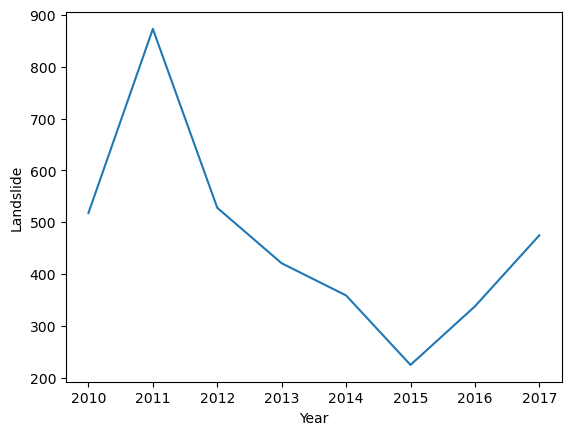

In [18]:
sns.lineplot(df_grp, x = "Year", y = "Landslide")

plt.show()

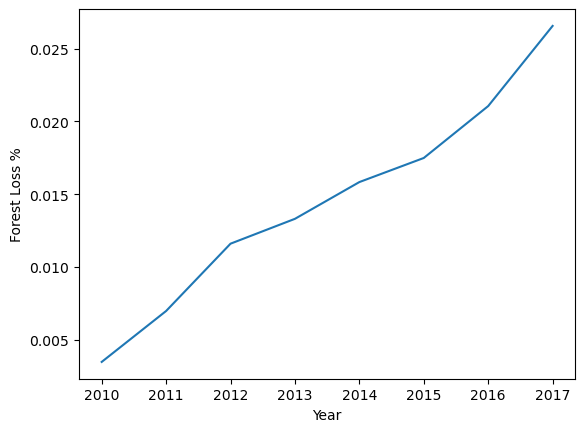

In [19]:
sns.lineplot(df_grp, x = "Year", y = "Forest Loss %")

plt.show()